<a href="https://colab.research.google.com/github/maya-g-y/Final-Project-ML-Module--Spotify/blob/main/Spotify3_Data_Cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleansing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load prepared dataset from pickle (created in Stage 2)
df = pd.read_pickle("/content/drive/MyDrive/pickle_files/final_df_EDA.pkl")

print("Shape:", df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (30942, 21)


,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_month,playlist_subgenre_simplified
0,i dont care with justin bieber loud luxury remix,ed sheeran,66,i dont care with justin bieber loud luxury remix,pop remix,pop,0.748,0.916,6,-2.634,...,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,6,dance pop
1,memories dillon francis remix,maroon 5,67,memories dillon francis remix,pop remix,pop,0.726,0.815,11,-4.969,...,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,12,dance pop
2,all the time don diablo remix,zara larsson,70,all the time don diablo remix,pop remix,pop,0.675,0.931,1,-3.432,...,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,7,dance pop
3,call you mine keanu silva remix,the chainsmokers,60,call you mine the remixes,pop remix,pop,0.718,0.930,7,-3.778,...,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,7,dance pop
4,someone you loved future humans remix,lewis capaldi,69,someone you loved future humans remix,pop remix,pop,0.650,0.833,1,-4.672,...,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,3,dance pop


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30942 entries, 0 to 32832
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   track_name                    30942 non-null  string  
 1   track_artist                  30942 non-null  string  
 2   track_popularity              30942 non-null  int64   
 3   track_album_name              30942 non-null  string  
 4   playlist_name                 30942 non-null  string  
 5   playlist_genre                30942 non-null  category
 6   danceability                  30942 non-null  float64 
 7   energy                        30942 non-null  float64 
 8   key                           30942 non-null  int64   
 9   loudness                      30942 non-null  float64 
 10  mode                          30942 non-null  category
 11  speechiness                   30942 non-null  float64 
 12  acousticness                  30942 non-null  float


#Outliers

In [3]:
#Make a copy to the df
df_cls = df.copy()

# Define numeric columns
numeric_cols = df_cls.select_dtypes(include=['number']).columns

# Convert all columns to float
df_cls[numeric_cols] = df_cls[numeric_cols].apply(pd.to_numeric, errors='coerce').astype(float)

# Check if any new NaN values were created during numeric conversion
print("Missing values introduced:", df_cls[numeric_cols].isna().sum().sum())

# Detect outliers using IQR (robust method for non-normal distributions)
outlier_summary_iqr = []

for col in numeric_cols:
    Q1 = df_cls[col].quantile(0.25)
    Q3 = df_cls[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df_cls[col] < lower) | (df_cls[col] > upper)).sum()
    outlier_percent = (outlier_count / len(df_cls)) * 100

    outlier_summary_iqr.append({
        "feature": col,
        "outlier_count": outlier_count,
        "outlier_percent": round(outlier_percent, 2)
    })


# Convert to DataFrame and sort
outlier_summary_iqr = pd.DataFrame(outlier_summary_iqr).sort_values("outlier_percent", ascending=False)

# Display the table
display(outlier_summary_iqr)


Missing values introduced: 0


,feature,outlier_count,outlier_percent
7,instrumentalness,6660,21.52
12,release_year,2938,9.50
5,speechiness,2934,9.48
6,acousticness,2061,6.66
8,liveness,1740,5.62
11,duration_ms,1362,4.40
4,loudness,963,3.11
10,tempo,599,1.94
1,danceability,299,0.97
2,energy,272,0.88


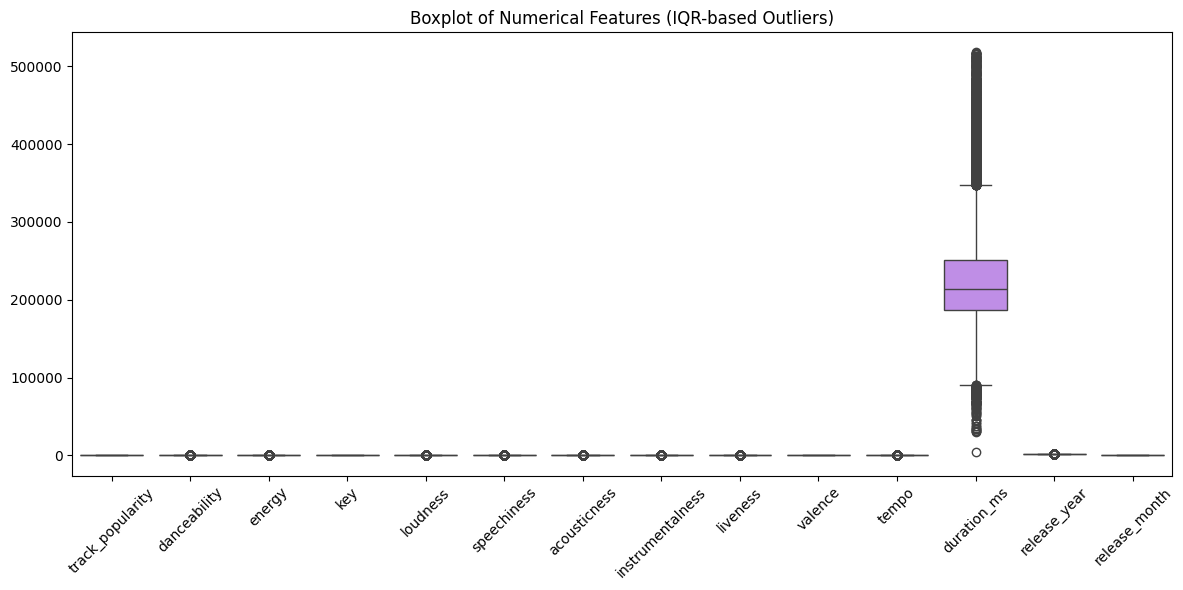

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#Boxplot for all numerical features
# Helps identify features with potential outliers based on the IQR rule

plt.figure(figsize=(12,6))
sns.boxplot(data=df_cls[numeric_cols])
plt.title("Boxplot of Numerical Features (IQR-based Outliers)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


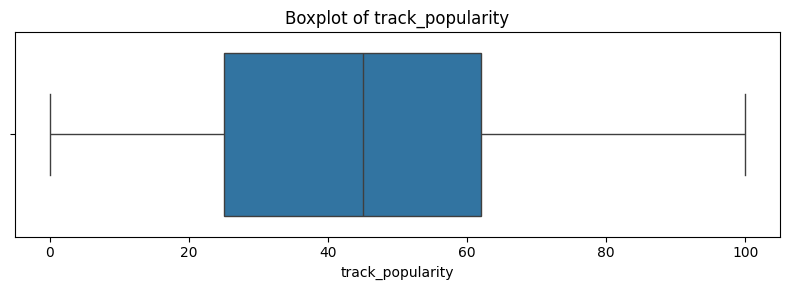

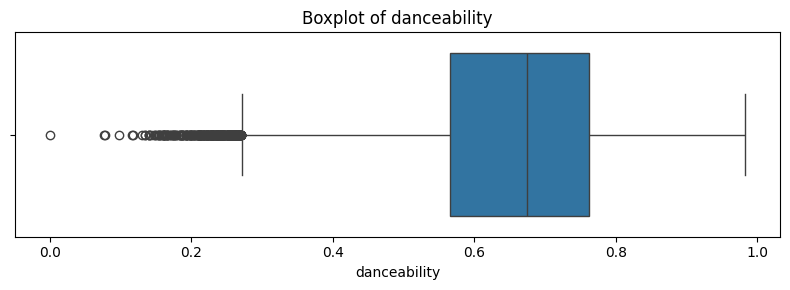

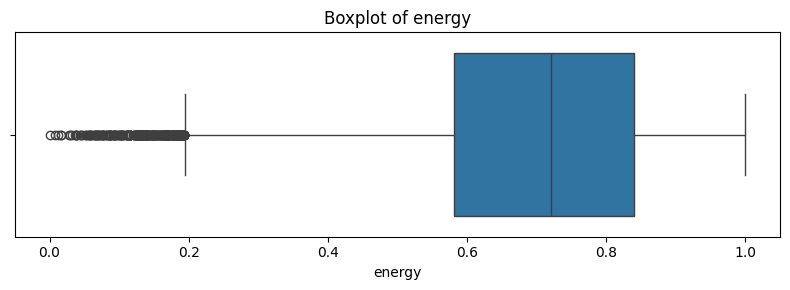

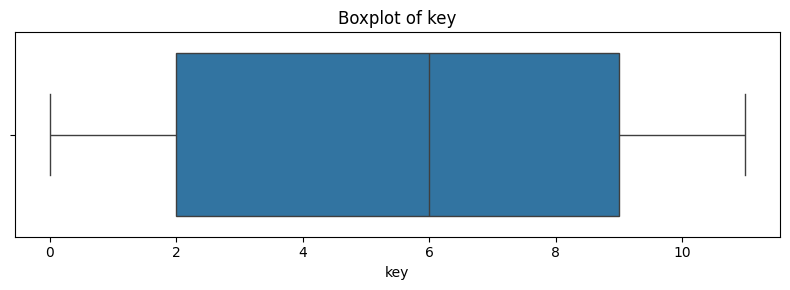

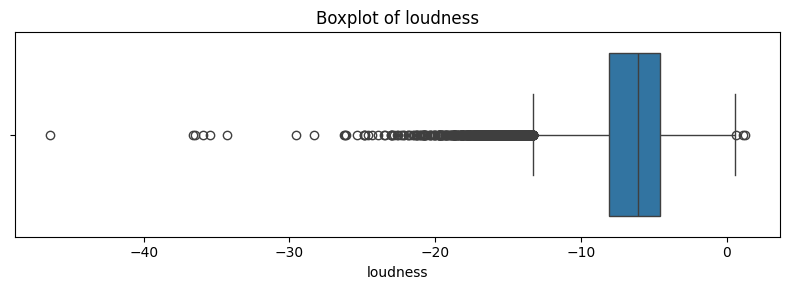

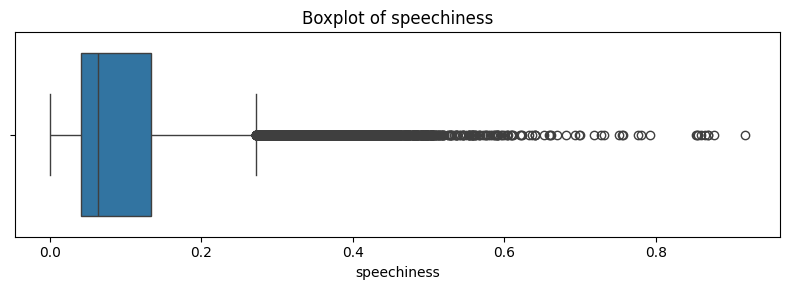

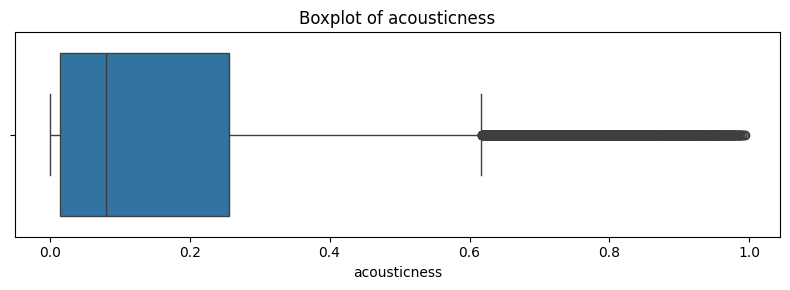

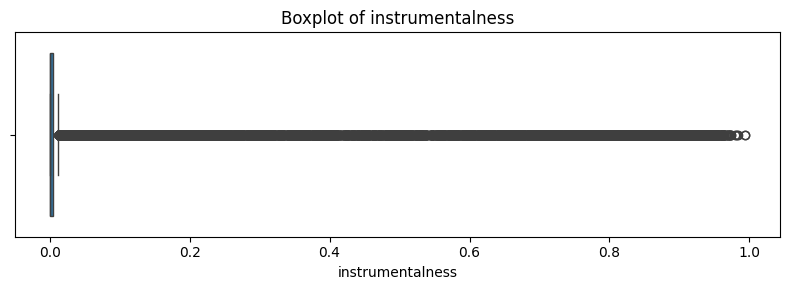

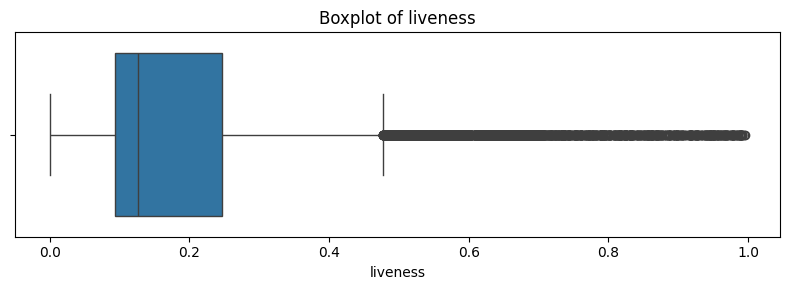

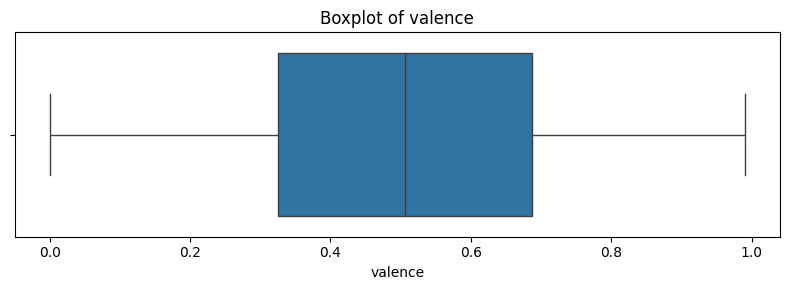

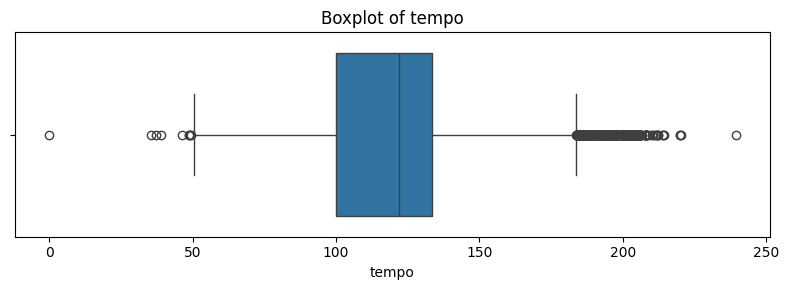

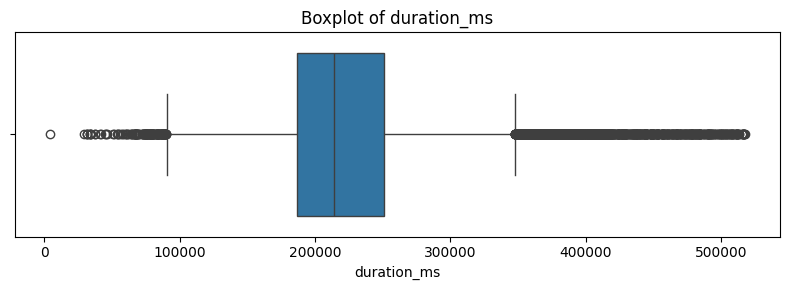

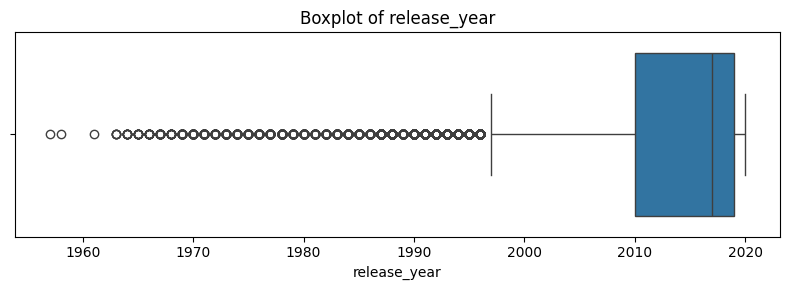

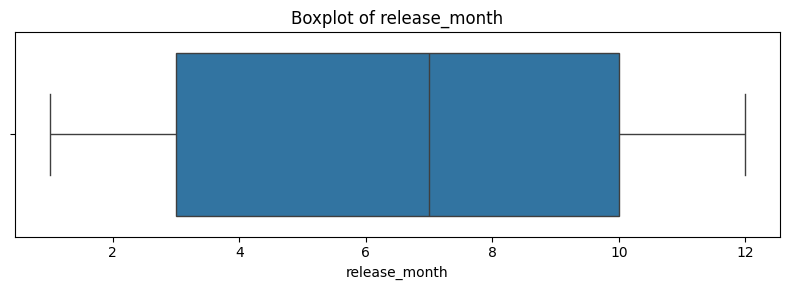

In [5]:

# Generates a separate boxplot for each feature to visually inspect its outliers

for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col], orient='h')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1605388582.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outlier_summary_iqr, x="outlier_percent", y="feature", palette="coolwarm")


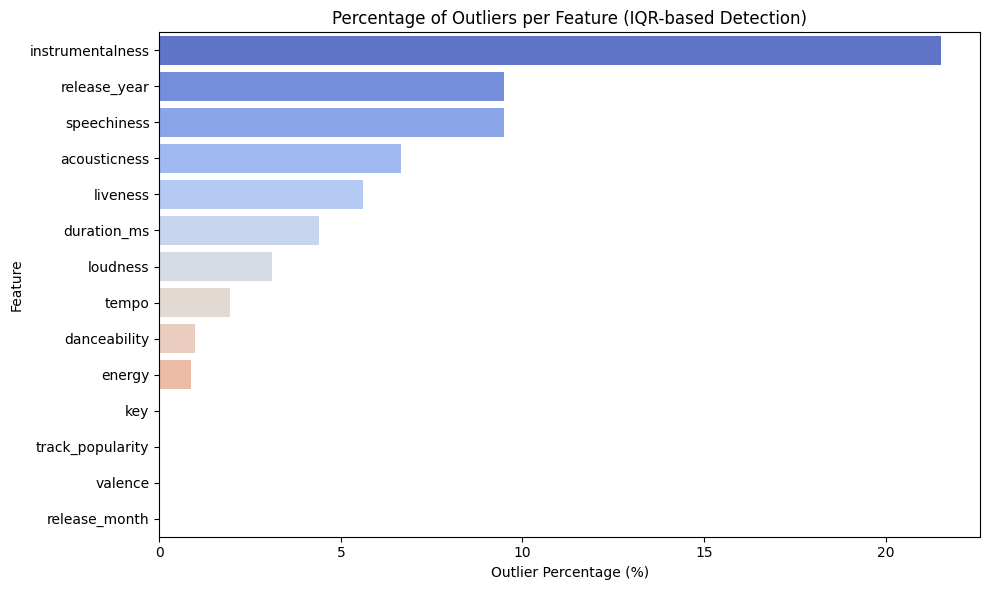

In [6]:

# arplot showing percentage of outliers per feature
# Displays the percentage of detected outliers in each feature (based on IQR)
# Makes it easy to compare which features contain the most extreme values

plt.figure(figsize=(10,6))
sns.barplot(data=outlier_summary_iqr, x="outlier_percent", y="feature", palette="coolwarm")
plt.title("Percentage of Outliers per Feature (IQR-based Detection)")
plt.xlabel("Outlier Percentage (%)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Outlier Impact Analysis (IQR-based)

This code identifies and evaluates outliers for each numeric feature using the **Interquartile Range (IQR)** method.  
For every feature:
- It calculates the lower and upper IQR boundaries (`Q1 - 1.5*IQR`, `Q3 + 1.5*IQR`) to detect outliers.  
- It then compares each feature’s **distribution** and **correlation** with the target variable (`playlist_genre`) before and after removing outliers.  
- `KS_p` from the Kolmogorov–Smirnov test measures how much the distribution changes.  
- `Delta_abs_r` (the absolute difference in Spearman correlation) measures how much the relationship with `playlist_genre` changes.

A feature is marked as `drop = "yes"` **only if** its **distribution changes** (`distribution_changed = +`) **and** its **correlation does not change** (`correlation_changed = -`).  
These are the cases where removing or adjusting outliers is most beneficial — they distort the shape of the data but don’t provide meaningful predictive information.


In [7]:
from scipy.stats import ks_2samp, spearmanr
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Encode the target variable ('playlist_genre')
if "playlist_genre_encoded" not in df_cls.columns:
    le = LabelEncoder()
    df_cls["playlist_genre_encoded"] = le.fit_transform(df_cls["playlist_genre"])

# Build outlier indicator matrix (IQR)
con_df = df_cls[numeric_cols].copy()
df_outliers = pd.DataFrame(index=df_cls.index, columns=numeric_cols, dtype=int)

for col in numeric_cols:
    s = con_df[col]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df_outliers[col] = ((s < lower) | (s > upper)).astype(int)

# create an impact table to analyze the effect of outliers on distributions and correlations
rows = []
np.seterr(divide='ignore', invalid='ignore')

for col in numeric_cols:
    # With outliers
    x_out = df_cls[col].dropna()
    y_out = df_cls.loc[x_out.index, "playlist_genre_encoded"]

    # Without outliers for this feature
    mask_non = (df_outliers[col] == 0)
    x_non = df_cls.loc[mask_non, col].dropna()
    y_non = df_cls.loc[x_non.index, "playlist_genre_encoded"]

    # Counts
    outliers_cnt = int(df_outliers[col].sum())

    # KS test (distribution change)
    ks_p = ks_2samp(x_out, x_non).pvalue if (len(x_out) > 1 and len(x_non) > 1) else np.nan
    dist_change = '+' if (not np.isnan(ks_p) and ks_p < 0.05) else '-'

    # Spearman vs target (correlation change)
    r_b = spearmanr(x_out, y_out)[0] if (len(x_out) > 1 and len(y_out) > 1) else np.nan
    r_a = spearmanr(x_non, y_non)[0] if (len(x_non) > 1 and len(y_non) > 1) else np.nan
    if not (np.isnan(r_b) or np.isnan(r_a)):
        delta_r = abs(r_b - r_a)
        cor_change = '+' if delta_r > 0.05 else '-'
    else:
        delta_r, cor_change = np.nan, '-'

    rows.append({
        "feature": col,
        "outliers_cnt": outliers_cnt,
        "KS_p": ks_p,
        "Spearman_before": r_b,
        "Spearman_after": r_a,
        "Delta_abs_r": delta_r,
        "distribution_changed": dist_change,
        "correlation_changed": cor_change
    })

out_df = pd.DataFrame(rows).sort_values("outliers_cnt", ascending=False)

# Decision rule:
# Mark a feature for outlier treatment only if its distribution changed (+)
# but its correlation with the target did NOT change (-)
out_df["drop"] = np.where(
    (out_df["distribution_changed"] == "+") & (out_df["correlation_changed"] == "-"),
    "yes", "no"
)

# Sort table so that features flagged for treatment appear first
out_df = out_df.sort_values(["drop", "outliers_cnt"], ascending=[False, False])

display(out_df.head(20))
print("Impact table created with updated decision rule. No data was modified.")


,feature,outliers_cnt,KS_p,Spearman_before,Spearman_after,Delta_abs_r,distribution_changed,correlation_changed,drop
6,acousticness,2061,4.567670e-58,0.126316,0.106097,0.020219,+,-,yes
8,liveness,1740,9.821225e-42,-0.014020,-0.004546,0.009473,+,-,yes
11,duration_ms,1362,4.574953e-21,0.176899,0.196369,0.019471,+,-,yes
4,loudness,963,3.622386e-13,-0.279750,-0.269189,0.010561,+,-,yes
10,tempo,599,2.864354e-05,-0.077234,-0.087321,0.010087,+,-,yes
7,instrumentalness,6660,0.000000e+00,-0.121169,0.016059,0.137228,+,+,no
12,release_year,2938,8.447332e-116,-0.343723,-0.200461,0.143262,+,+,no
5,speechiness,2934,1.711719e-115,-0.031639,-0.082259,0.050619,+,+,no
1,danceability,299,1.120521e-01,-0.167046,-0.154750,0.012297,-,-,no
2,energy,272,1.837752e-01,-0.233351,-0.229522,0.003829,-,-,no


Impact table created with updated decision rule. No data was modified.


### Selective Winsorization and Data Cleansing

Based on the results of the impact analysis, this section applies **Winsorization** only to the following features:  
`acousticness`, `liveness`, `duration_ms`, `loudness` and `tempo`.
This method caps extreme values at the IQR boundaries rather than deleting or replacing them,  
preserving both the structure and relationships of the data.

This approach ensures a balanced outlier handling process - reducing distortion without losing valuable data.


In [8]:
# Apply Winsorization only to features marked as 'drop == "yes"' based on previous analysis

def winsorize_iqr(df: pd.DataFrame, features: list[str]) -> pd.DataFrame:
    """Cap values outside IQR bounds (Q1-1.5*IQR, Q3+1.5*IQR) per feature."""
    df_new = df.copy()
    for col in features:
        s = df_new[col]
        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df_new.loc[s < lower, col] = lower
        df_new.loc[s > upper, col] = upper
    return df_new

# Select features to treat based on the rule:
# Treat only when distribution_changed == "+" AND correlation_changed == "-"
selected_features = out_df.loc[
    (out_df["drop"] == "yes"),
    "feature"
].tolist()

print(f"Features selected for treatment: {selected_features}")

# If no features selected, create a safe copy
if len(selected_features) == 0:
    df_cls_treated = df_cls.copy()
    print("No features marked for treatment. 'df_cls_treated' is identical to the original DataFrame.")
else:
    # Apply Winsorization and keep original intact
    df_cls_treated = winsorize_iqr(df_cls, selected_features)
    print("Winsorization applied to selected features. Original DataFrame remains unchanged.")

# Compare outlier counts before and after treatment
def _iqr_outlier_count(s: pd.Series) -> int:
    q1 = s.quantile(0.25); q3 = s.quantile(0.75); iqr = q3 - q1
    lower = q1 - 1.5 * iqr; upper = q3 + 1.5 * iqr
    return int(((s < lower) | (s > upper)).sum())

if len(selected_features) > 0:
    summary_rows = []
    for col in selected_features:
        before_cnt = _iqr_outlier_count(df_cls[col])
        after_cnt  = _iqr_outlier_count(df_cls_treated[col])
        summary_rows.append({
            "feature": col,
            "outliers_before": before_cnt,
            "outliers_after": after_cnt,
            "reduction": before_cnt - after_cnt
        })
    treatment_summary = pd.DataFrame(summary_rows).sort_values("reduction", ascending=False)
    display(treatment_summary)

# Save the treated dataset as a Pickle file
output_path = "/content/drive/MyDrive/pickle_files/final_df_cleansed.pkl"
df_cls_treated.to_pickle(output_path)
print(f"Cleaned dataset saved to: {output_path}")


Features selected for treatment: ['acousticness', 'liveness', 'duration_ms', 'loudness', 'tempo']
Winsorization applied to selected features. Original DataFrame remains unchanged.


,feature,outliers_before,outliers_after,reduction
0,acousticness,2061,0,2061
1,liveness,1740,0,1740
2,duration_ms,1362,0,1362
3,loudness,963,0,963
4,tempo,599,0,599


Cleaned dataset saved to: /content/drive/MyDrive/pickle_files/final_df_cleansed.pkl


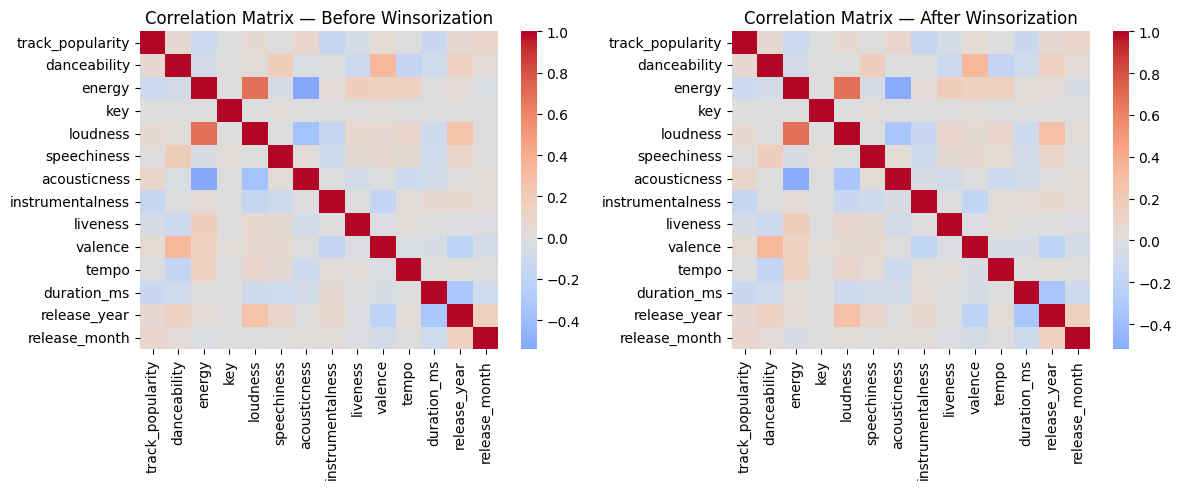

In [9]:
# Compare correlation matrices before and after Winsorization

# Create a figure with two subplots side-by-side
plt.figure(figsize=(12, 5))

#Correlation matrix before Winsorization
plt.subplot(1, 2, 1)
# Plot heatmap showing feature correlations before outlier treatment
sns.heatmap(df_cls[numeric_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix — Before Winsorization")

# Correlation matrix after Winsorization
plt.subplot(1, 2, 2)
# Plot heatmap showing feature correlations after outlier treatment
sns.heatmap(df_cls_treated[numeric_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix — After Winsorization")

# Adjust layout to prevent overlapping titles or labels
plt.tight_layout()

# Display both heatmaps
plt.show()


### 🧩 Correlation Matrices - Before vs. After Winsorization

The two heatmaps compare the correlation structure of numerical features **before and after Winsorization**.  
The results show that the overall correlation patterns remain **almost identical**, indicating that  
treating outliers did **not distort the relationships** between features.  
This confirms that Winsorization effectively reduced extreme values while preserving  
the natural dependencies and variability within the data —  
a desired outcome when stabilizing features without losing important information.


Checking for Missing Values After Winsorization

In [10]:
# Count missing values per column
missing_counts = df_cls_treated.isnull().sum()

# Display only columns that actually have missing values
missing_counts = missing_counts[missing_counts > 0]
print("Missing values per column:\n", missing_counts)


Missing values per column:
 Series([], dtype: int64)
